# Heart attack prediction using SVM classifier

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [3]:
df = pd.read_csv('data/heart.csv')

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Exploratory Data Analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


* Variables Sex, cp, fbs, restecg, exng, slp, caa, thall are categorical
* chol seems to have right skewed distribution

<AxesSubplot: xlabel='output', ylabel='count'>

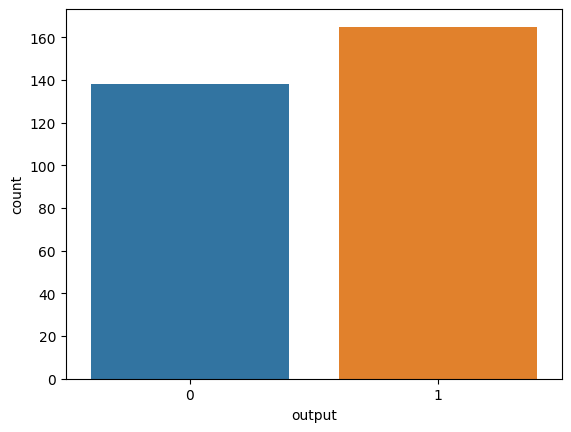

In [16]:
sns.countplot(x='output', data=df)

* This is a balanced dataset

In [17]:
#seperating categorical variables and cuntinous variables
cat_feat = []
num_feat = []

for col in df.columns:
    unique_values = len(df[col].unique())
    if unique_values < 10:
        cat_feat.append(col)
    else:
        num_feat.append(col)

In [18]:
cat_feat

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [19]:
num_feat

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

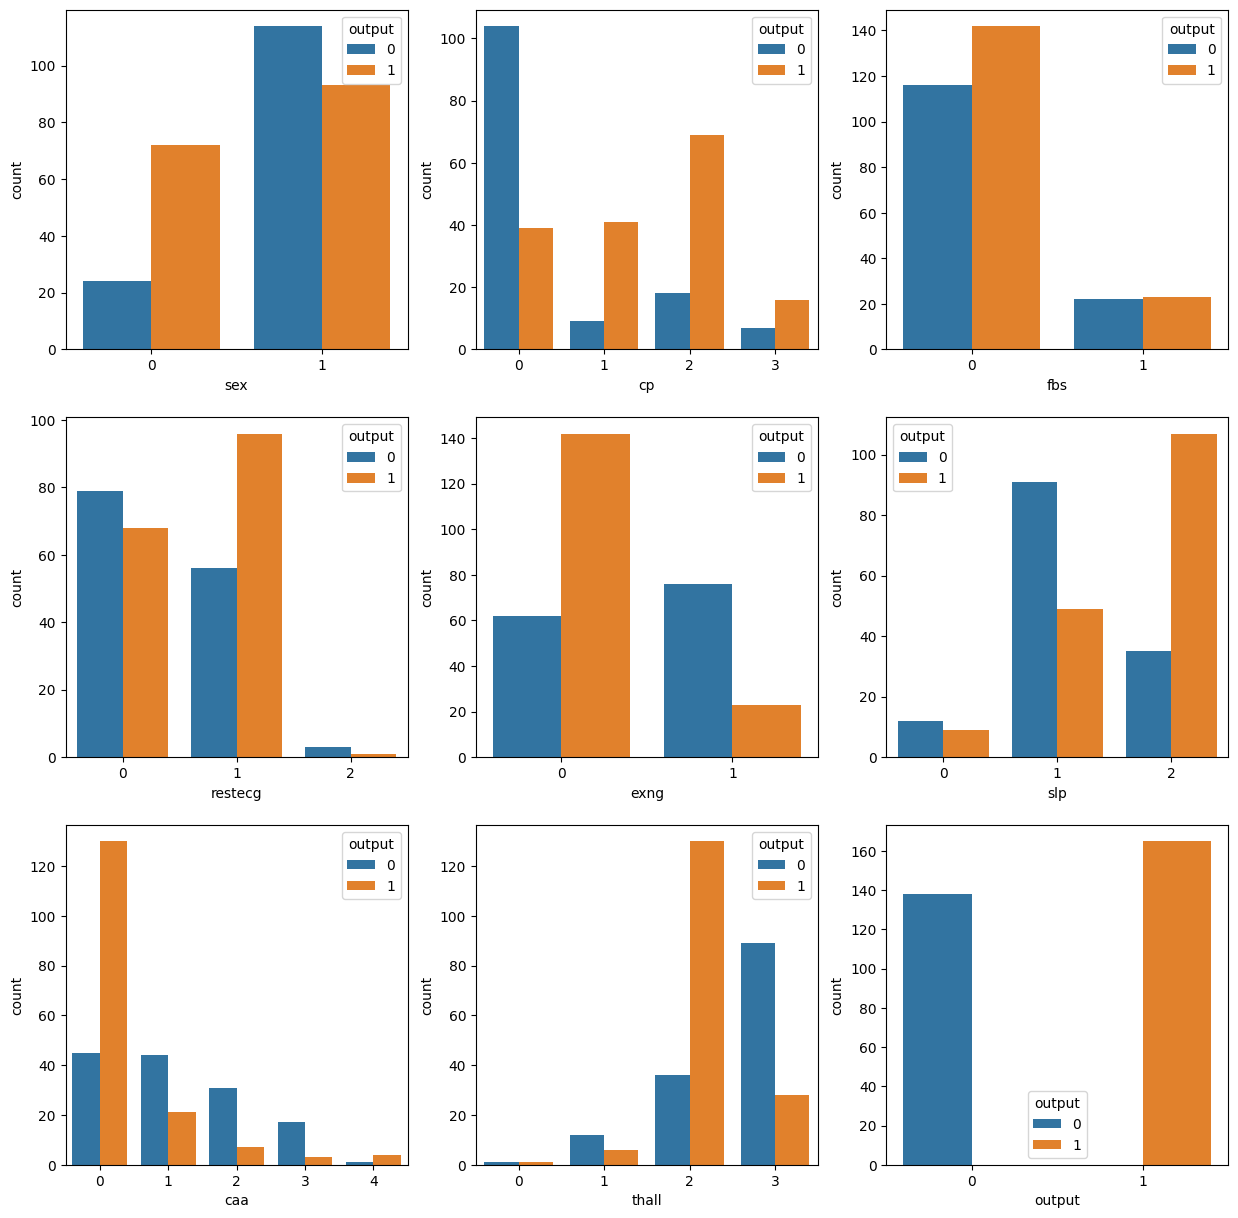

In [28]:
plt.figure(figsize=(15,15))

for i, col in enumerate(cat_feat, 1):
    plt.subplot(3,3,i)
    sns.countplot(x=col, data=df, hue='output')

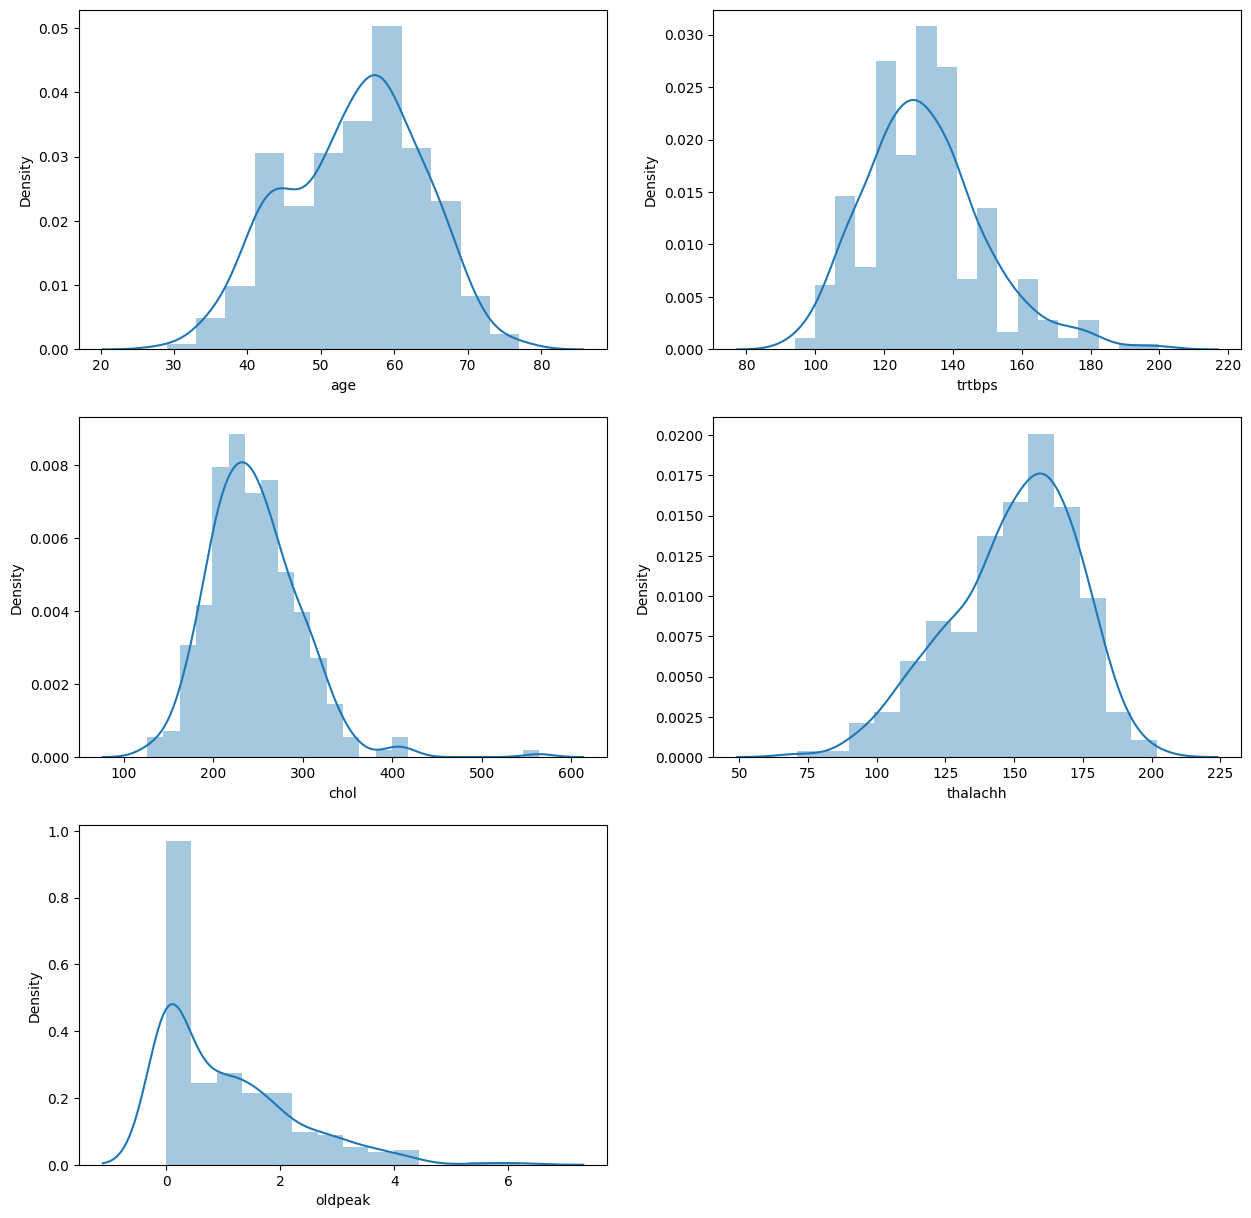

In [26]:
plt.figure(figsize=(15,15))

for i, col in enumerate(num_feat, 1):
    plt.subplot(3,2,i)
    sns.distplot(df[col])

* chol has some outliers
* oldpeak follows right skewed distribution
* rest of the features follows somewhat normal distribution

### Data preprocessing